# Binary Joint Use Case (Single DataFrameCase)

In this vignette a use case of the Binary Channel Entropy Triangle is presented. We are going to evaluate different multiclass-classification scenarios in order to analyze the data.
The main functionalities for the classification of the database will be extracted from: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

### Importing Libraries

We import the package entropytriangle, which will import the modules needed for the evaluation

In [1]:
from entropytriangle import * #importing all modules necessary for the plotting

## Download the databases

In this case, the csv files for the use case, are stored locally

In [2]:
#df = pd.read_csv('Arthitris.csv',delimiter=',',index_col='Unnamed: 0').drop(['ID'],axis = 1)
df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
#df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 60.1+ KB


In [4]:
df = df.fillna(0)
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,5,1,1,1,2,1.0,3,1,1,benign
2,5,4,4,5,7,10.0,3,2,1,benign
3,3,1,1,1,2,2.0,3,1,1,benign
4,6,8,8,1,3,4.0,3,7,1,benign
5,4,1,1,3,2,1.0,3,1,1,benign


### Prepare the data for the classification (Features - Classes) 

We are going to load the train_test_split that will allow us to separe automatically the data in a train/test sets. Additionally, we are going to import the contingency matrix that will allow us to calculate the joint entropy matrix of the classifier

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Separating the dataframe for features and classes

In [6]:
X = df[df.columns[df.columns != 'Class']]
y = df['Class']

We are now to define some classificators for evaluating their performance with the BreastCancer database

In [7]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# KNN

### KNN - Classifier (Don´t run the code if you want to implement other classifier)

Downloading the sklearn Knn classifier and fitting it into our data

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Once we have design our classifier, we are going to evaluate the accuracy

In [9]:
print(knn.score(X_test, y_test))

0.9771428571428571


Finally, we will compute the confusion matrix of the classified data

In [10]:
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[110,   2],
       [  2,  61]])

### KNN - Channel Bivariate Entropy Triangle Plotting

The last step will be calculating the entropic measures for the contingency matrix and plot the entropy triangle. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparission

In [11]:
edf = jentropies_binary(cm)
#edf1 = jentropies(pd.DataFrame(y_test),pd.DataFrame(knn_predictions))

In [12]:
edf
#edf1

,H_U2,H_P2,DeltaH_P2,M_P2,VI_P2
Type,,,,,
X,1.0,0.942683,0.057317,0.786867,0.155816
Y,1.0,0.942683,0.057317,0.786867,0.155816
XY,2.0,1.885366,0.114634,1.573734,0.311632


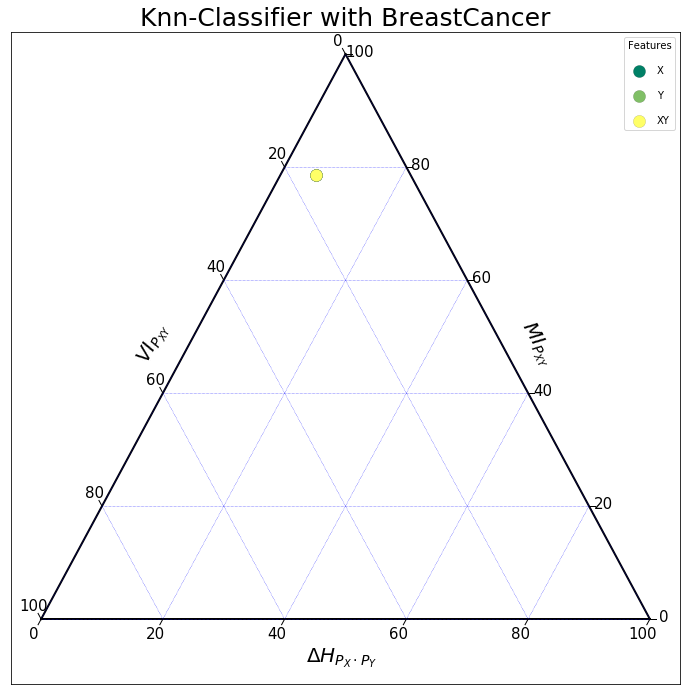

In [13]:
entriangle(edf,s_mk=150, gridl = 20, pltscale=12 ,fonts = 20, ticks_size= 15,chart_title="Knn-Classifier with BreastCancer")

# Naive Bayes

### Naive Bayes - Classificator 

Now we are going to provide another example of the channel bivariate entropy triangle using the Naive Bayes classificatior. We will need first to download the GaussianNB class from scikit-learn and apply the following command to train the classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

Once we have model our classifier, we are going to evaluate the accuracy using the test set

In [15]:
print(gnb.score(X_test, y_test))

0.9542857142857143


Finally, we will compute the confusion matrix of the classified data

In [16]:
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[106,   6],
       [  2,  61]])

### Naive Bayes - Channel Bivariate Entropy Triangle Plotting

The last step will be calculating the entropic measures for the contingency matrix and plot the entropy triangle. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle. First we will calculate the entropy data frame for the contingency matrix

In [17]:
edf = jentropies_binary(cm)

In [18]:
edf

,H_U2,H_P2,DeltaH_P2,M_P2,VI_P2
Type,,,,,
X,1.0,0.942683,0.057317,0.694046,0.248637
Y,1.0,0.960035,0.039965,0.694046,0.265989
XY,2.0,1.902718,0.097282,1.388092,0.514626


Once we obtained the appropiate entropy data frame, we just need to execute the entriangle function for the plotting

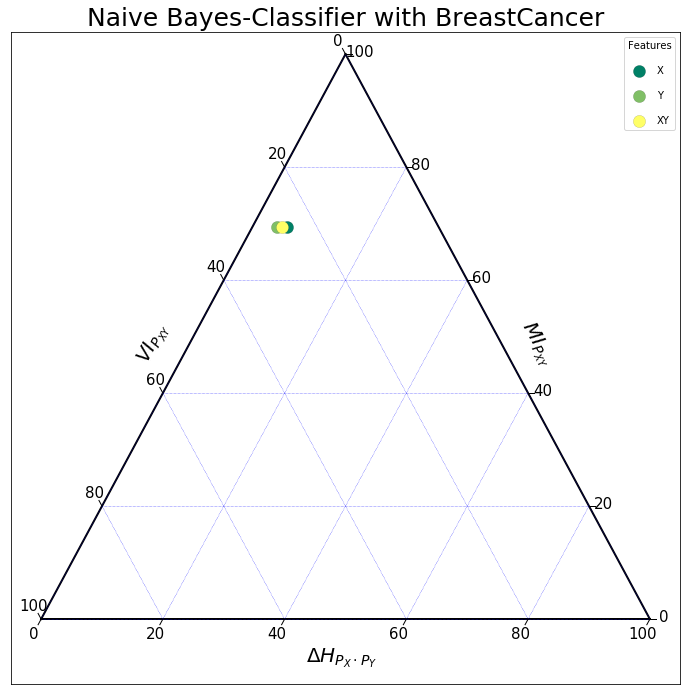

In [19]:
entriangle(edf,s_mk=150, gridl = 20, pltscale=12 ,fonts = 20, ticks_size= 15,chart_title="Naive Bayes-Classifier with BreastCancer")